# Fraud Analysis 

## Data Introduction 

In [595]:
import pandas as pd
import numpy as np
import tkinter as tk
import matplotlib.pyplot as plt
import matplotlib as mpl
from tkinter import filedialog
from pandas import DataFrame
import seaborn as sns

In [596]:
# Upload Data  
train_benFile= "C:/Users/Nicole/Desktop/fraud_detection/Train_Beneficiarydata-1542865627584.csv"
train_ben= pd.read_csv(train_benFile)
train_ben


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,...,2,2,2,2,2,2,0,0,430,460
138552,BENE159195,1938-12-01,NaN,2,1,0,49,530,12,12,...,2,1,2,2,2,2,0,0,880,100
138553,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,...,1,1,1,2,2,2,2000,1068,3240,1390
138554,BENE159197,1930-01-01,NaN,1,1,0,16,560,12,12,...,2,2,1,2,2,2,0,0,2650,10


In [597]:
train_inpatientFile= "C:/Users/Nicole/Desktop/fraud_detection/Train_Inpatientdata-1542865627584.csv"
train_inpatient= pd.read_csv(train_inpatientFile)
train_inpatient

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,...,79092,70704,2869,4148,9904.0,NaN,NaN,NaN,NaN,NaN
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,49122,4254,5990,NaN,8605.0,NaN,NaN,NaN,NaN,NaN
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,71534,71590,V4502,NaN,9390.0,NaN,NaN,NaN,NaN,NaN
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,4263,0414,41400,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [598]:
train_outpatientFile= "C:/Users/Nicole/Desktop/fraud_detection/Train_Outpatientdata-1542865627584.csv"
train_outpatient= pd.read_csv(train_outpatientFile)
train_outpatient 

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,2163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,07041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,V570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


#### Test Sets 

In [599]:
test_benFile= "C:/Users/Nicole/Desktop/fraud_detection/Test_Beneficiarydata-1542969243754.csv"
test_ben= pd.read_csv(test_benFile)
test_ben

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,2,1,1,1,2,2,0,0,1170,660
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,1938-04-01,NaN,2,1,Y,45,780,12,12,...,1,2,1,2,2,2,21260,2136,120,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63963,BENE159187,1959-07-01,NaN,1,1,0,27,140,12,12,...,1,1,1,2,2,2,0,0,2650,450
63964,BENE159193,1936-12-01,NaN,2,1,0,36,170,12,12,...,2,2,2,2,2,2,0,0,110,50
63965,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,...,2,2,2,2,2,2,0,0,430,460
63966,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,...,1,1,1,2,2,2,2000,1068,3240,1390


In [600]:
test_inpatientFile= "C:/Users/Nicole/Desktop/fraud_detection/Test_Inpatientdata-1542969243754.csv"
test_inpatient= pd.read_csv(test_inpatientFile)
test_inpatient

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,...,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,...,V6109,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,BENE159139,CLM61015,2009-07-24,2009-07-26,PRV55021,23000,PHY406228,PHY406228,NaN,2009-07-24,...,53540,5715,56210,NaN,5122.0,4019.0,NaN,NaN,NaN,NaN
9547,BENE159143,CLM42885,2009-03-16,2009-03-29,PRV55017,34000,PHY354080,NaN,NaN,2009-03-16,...,78720,72402,V5413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9548,BENE159155,CLM67124,2009-09-07,2009-10-12,PRV53758,5000,PHY338118,NaN,NaN,2009-09-07,...,E8798,60000,28521,4280,NaN,NaN,NaN,NaN,NaN,NaN
9549,BENE159181,CLM72016,2009-10-14,2009-10-17,PRV57195,3000,PHY328451,NaN,NaN,2009-10-14,...,2724,25080,29383,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [601]:
test_outpatientFile= "C:/Users/Nicole/Desktop/fraud_detection/Test_Outpatientdata-1542969243754.csv"
test_outpatient= pd.read_csv(test_outpatientFile)
test_outpatient 

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11007,CLM496381,2009-07-29,2009-07-29,PRV56573,10,PHY393253,PHY347995,NaN,58889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5939
4,BENE11007,CLM521391,2009-08-12,2009-08-12,PRV56573,10,PHY417685,NaN,PHY382041,V666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125836,BENE159193,CLM469576,2009-07-14,2009-07-14,PRV55485,70,PHY431265,NaN,NaN,79021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
125837,BENE159193,CLM483842,2009-07-22,2009-07-22,PRV55485,10,PHY369098,NaN,NaN,72811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
125838,BENE159193,CLM554925,2009-08-31,2009-08-31,PRV55485,30,PHY431298,NaN,NaN,9181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,92420
125839,BENE159194,CLM347777,2009-05-08,2009-05-08,PRV55889,30,PHY406767,NaN,PHY406767,V4582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


### Merged Datasets for Train and Test 

#### Since we will most likely clean both the train and test sets, it makes sense to remerge the inpatient and outpatient test and train set 

In [602]:
frames_outpatient= [train_outpatient, test_outpatient]

In [603]:
merged_outpatient= pd.concat(frames_outpatient)
merged_outpatient

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125836,BENE159193,CLM469576,2009-07-14,2009-07-14,PRV55485,70,PHY431265,NaN,NaN,79021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
125837,BENE159193,CLM483842,2009-07-22,2009-07-22,PRV55485,10,PHY369098,NaN,NaN,72811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
125838,BENE159193,CLM554925,2009-08-31,2009-08-31,PRV55485,30,PHY431298,NaN,NaN,9181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,92420
125839,BENE159194,CLM347777,2009-05-08,2009-05-08,PRV55889,30,PHY406767,NaN,PHY406767,V4582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [604]:
frames_inpatient= [train_inpatient, test_inpatient]

In [605]:
merged_inpatient= pd.concat(frames_inpatient)
merged_inpatient

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,BENE159139,CLM61015,2009-07-24,2009-07-26,PRV55021,23000,PHY406228,PHY406228,NaN,2009-07-24,...,53540,5715,56210,NaN,5122.0,4019.0,NaN,NaN,NaN,NaN
9547,BENE159143,CLM42885,2009-03-16,2009-03-29,PRV55017,34000,PHY354080,NaN,NaN,2009-03-16,...,78720,72402,V5413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9548,BENE159155,CLM67124,2009-09-07,2009-10-12,PRV53758,5000,PHY338118,NaN,NaN,2009-09-07,...,E8798,60000,28521,4280,NaN,NaN,NaN,NaN,NaN,NaN
9549,BENE159181,CLM72016,2009-10-14,2009-10-17,PRV57195,3000,PHY328451,NaN,NaN,2009-10-14,...,2724,25080,29383,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [606]:
frames_ben= [train_ben,test_ben]

In [607]:
merged_ben= pd.concat(frames_ben)
merged_ben

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63963,BENE159187,1959-07-01,NaN,1,1,0,27,140,12,12,...,1,1,1,2,2,2,0,0,2650,450
63964,BENE159193,1936-12-01,NaN,2,1,0,36,170,12,12,...,2,2,2,2,2,2,0,0,110,50
63965,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,...,2,2,2,2,2,2,0,0,430,460
63966,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,...,1,1,1,2,2,2,2000,1068,3240,1390


### Number of Unique Beneficiaries, Providers and Claims in each Dataset 

#### Number of Unique Beneficiaries in each Set 

In [608]:
merged_ben['BeneID'].nunique()

148072

In [609]:
merged_inpatient['BeneID'].nunique()

37418

In [610]:
merged_outpatient['BeneID'].nunique()

144189

#### Number of Unique Claim Ids in each Set 

In [611]:
merged_outpatient['ClaimID'].nunique()

643578

In [612]:
merged_inpatient['ClaimID'].nunique()

50025

#### Number of Unique Providers in each Set 

In [613]:
merged_outpatient['Provider'].nunique()

6271

In [614]:
merged_outpatient['Provider'].nunique()

6271

### Should we merge the inpatient and outpatient information given that there are some patients and/or providers that are both in the inpatient and outpatient datasets?  

Based on background knowledge, inpatient and outpatient services are different and so the providers would be different hence there should be no overlap. However, we will confirm nonetheless. We do this by checking if there are patients in the inpatient file that are also in the outpatient file. 

In [615]:
ben_list_inpatient= merged_inpatient['BeneID'].unique()
ben_in= pd.DataFrame(ben_list_inpatient)
ben_in

,0
0,BENE11001
1,BENE11011
2,BENE11014
3,BENE11017
4,BENE11018
...,...
37413,BENE159117
37414,BENE159139
37415,BENE159155
37416,BENE159181


In [616]:
# create a list with all unique beneficiary IDs in the outpatient dataset. 
ben_list_outpatient= merged_outpatient['BeneID'].unique()
# convert list to a df 
ben_out= pd.DataFrame(ben_list_outpatient)
ben_out

,0
0,BENE11002
1,BENE11003
2,BENE11004
3,BENE11005
4,BENE11006
...,...
144184,BENE159088
144185,BENE159135
144186,BENE159144
144187,BENE159149


In [617]:
# create another list which contains entries that are both in outpatient and inpatient file 
overlap=ben_out.isin(ben_in)
# to access the .unique() function, we convert overlap to a series 
overlap= overlap.squeeze()
type(overlap)

# Since there are no "True"values, then we do not have any overlap
overlap.unique()


array([False])

In [618]:
# we do the same for providers  
prov_list_inpatient= merged_inpatient['Provider'].unique()
prov_in= pd.DataFrame(prov_list_inpatient)
prov_in

,0
0,PRV55912
1,PRV55907
2,PRV56046
3,PRV52405
4,PRV56614
...,...
2607,PRV56817
2608,PRV54826
2609,PRV54987
2610,PRV52023


In [619]:
prov_list_outpatient= merged_outpatient['Provider'].unique()
prov_out= pd.DataFrame(prov_list_outpatient)
prov_out

,0
0,PRV56011
1,PRV57610
2,PRV57595
3,PRV55951
4,PRV55903
...,...
6266,PRV56372
6267,PRV54617
6268,PRV53736
6269,PRV53089


In [620]:
overlap_prov=prov_out.isin(prov_in)
overlap_prov= overlap_prov.squeeze()
type(overlap_prov)

overlap_prov.unique()

array([False])

### There is no overlap and so there is no value in merging the inpatient and outpatient files. This simplifies our workflow. Now we need to merge the beneficiary information to both the inpatient and outpatient datasets. However, it makes sense to 'clean'  the beneficiary dataset  before merging it with the inpatient and outpatient datasets.

In [621]:
tmp_ben1= merged_ben
#tmp_ben1['RenalDiseaseIndicator'].unique()

In [622]:
tmp_ben1['RenalDiseaseIndicator']= tmp_ben1['RenalDiseaseIndicator'].astype(str)

In [623]:
 def renal_cleaner (df): 
    len_renal= len(df)
    df2= []
    for i in range(len_renal): 
        val= df.iloc[i]['RenalDiseaseIndicator']
        if val == 'Y':
            val= 1
            df2.append(val)
        else:
            df2.append(val)
    return df2
        

In [624]:
j=renal_cleaner(tmp_ben1)
j

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 1,
 '0',
 '0',
 '0',
 '0',
 1,
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 1,
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 1,
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 1,
 '0',
 1,
 '0',
 '0',
 '0',
 '0',
 '0',
 1,
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 1,
 '0',
 '0',
 '0',
 1,
 1,
 '0',
 1,
 '0',
 '0',
 '0',
 '0',
 1,
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 1,
 '0',
 '0',
 1,
 '0',
 '0',
 '0',
 '0',
 1,
 '0',
 '0',
 '0',
 '0',
 1,
 1,
 '0',
 '0',
 '0',
 1,
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 1,
 '0',
 '0',
 1,
 '0',
 '0',
 1,
 '0',
 '0',
 '0',
 1,
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 1,
 1,
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 1,
 1,
 '0',
 '0',
 '0',
 '

In [625]:
tmp_ben1['RenalDiseaseIndicator']= j 

In [626]:
## Only col with severl null values is the DOD col
tmp_ben1.isnull().sum()

BeneID                                  0
DOB                                     0
DOD                                200529
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

### Merge Changes 

In [627]:
tmp_out= merged_outpatient

In [628]:
tmp_ben= tmp_ben1

In [629]:
inner_join_out=pd.merge(tmp_out,tmp_ben, on='BeneID', how='inner')
inner_join_out

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,2,2,2,0,0,30,50
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,2,2,1,2,2,2,0,0,90,40
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,2,1,1,1,1,2,0,0,1810,760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980584,BENE159144,CLM174166,2009-02-03,2009-02-03,PRV55844,10,PHY374369,NaN,NaN,V6759,...,2,2,2,2,2,2,0,0,10,0
980585,BENE159149,CLM631108,2009-10-14,2009-11-03,PRV54987,600,PHY364693,PHY364693,PHY364693,V560,...,2,2,2,2,2,2,0,0,600,500
980586,BENE159193,CLM469576,2009-07-14,2009-07-14,PRV55485,70,PHY431265,NaN,NaN,79021,...,2,2,2,2,2,2,0,0,110,50
980587,BENE159193,CLM483842,2009-07-22,2009-07-22,PRV55485,10,PHY369098,NaN,NaN,72811,...,2,2,2,2,2,2,0,0,110,50


In [630]:
#No NAN claimid value so each beneID was matched to a claim 
inner_join_out.ClaimID.isnull().sum()

0

#### To double check the merge, we see if the expected number of cols and rows are reflected in the new dataset. We get a df with 980589 rows × 51 columns which is correct. 

In [631]:
tmp_in= merged_inpatient

In [632]:
inner_join_in=pd.merge(tmp_in,tmp_ben, on='BeneID', how='inner')
inner_join_in

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,1,2,1,1,36000,3204,60,70
2,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,1,2,1,1,36000,3204,60,70
3,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,1,2,1,1,36000,3204,60,70
4,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,1,2,1,1,36000,3204,60,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76822,BENE159155,CLM67124,2009-09-07,2009-10-12,PRV53758,5000,PHY338118,NaN,NaN,2009-09-07,...,2,1,1,2,2,2,13600,1068,0,0
76823,BENE159181,CLM72016,2009-10-14,2009-10-17,PRV57195,3000,PHY328451,NaN,NaN,2009-10-14,...,1,1,1,2,2,2,3000,1068,3440,260
76824,BENE159181,CLM72016,2009-10-14,2009-10-17,PRV57195,3000,PHY328451,NaN,NaN,2009-10-14,...,1,1,1,2,2,2,3000,1068,3440,260
76825,BENE159196,CLM47313,2009-04-17,2009-04-18,PRV51854,2000,PHY377087,NaN,NaN,2009-04-17,...,1,1,1,2,2,2,2000,1068,3240,1390


In [633]:
inner_join_in.ClaimID.isnull().sum()

0

#### We do the same check and for the inpatient dataset, we get a df with 76827 rows × 54 columns which is correct. 

### Exploring NaNs 

#### For outpatient dataset, it is worth keeping the column ClmDiagnosisCode_n up to n=10. As for .ClmProcedureCode_n, we can definately drop  n=4, 5,6 and keep the rest.

In [634]:
inner_join_out.ClmDiagnosisCode_10.unique()

array([nan, 'V059', '4019', 'V4581', '2720', '490', '1970', '7962',
       '25000', '78909', 'V420', '78650', '8074', 'V1005', '74685',
       'V072', '5856', '2733', '7804', '2449', 'E8490', '1539', '25200',
       '4240', '2763', '29410', '70719', '25080', 'V140', '78079', 'V065',
       'E887', '29680', '41401', '28803', '1619', '34590', 'E9060',
       '56210', '7354', '87363', '9140', '7802', '53081', '4168', '30500',
       '2768', '514', '29590', '25002', '8860', '412', '99591', 'V1046',
       '4439', '2869', '42731', '7220', '5849', '20280', 'E8889', '33811',
       'V5867', 'V5883', '42789', '135', '9100', '95901', '4820', '7282',
       '2724', '58881', '7291', 'V078', '1976', '51889', '71699', 'E8859',
       '72402', 'E9600', '72887', 'E8809', '73392', 'V4573', '3970',
       '3572', 'V5861', '72888', '0389', 'E8782', '71946', '70714',
       '3439', '36441', 'E8496', '29620', '8470', '4400', '95909',
       '40391', 'E918', '78900', '7197', 'V142', '2639', 'E9289', 'E8881

In [635]:
inner_join_out.ClmProcedureCode_6.unique()

array([nan])

In [636]:
inner_join_out.ClmProcedureCode_5.unique()

array([nan])

In [637]:
inner_join_out.ClmProcedureCode_4.unique()

array([  nan, 7840.,  311.])

In [638]:
#inner_join_out= inner_join_out.drop(drop_outp, axis=1)
#inner_join_out

In [639]:
outpatient=inner_join_out
outpatient

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,2,2,2,0,0,30,50
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,2,2,1,2,2,2,0,0,90,40
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,2,1,1,1,1,2,0,0,1810,760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980584,BENE159144,CLM174166,2009-02-03,2009-02-03,PRV55844,10,PHY374369,NaN,NaN,V6759,...,2,2,2,2,2,2,0,0,10,0
980585,BENE159149,CLM631108,2009-10-14,2009-11-03,PRV54987,600,PHY364693,PHY364693,PHY364693,V560,...,2,2,2,2,2,2,0,0,600,500
980586,BENE159193,CLM469576,2009-07-14,2009-07-14,PRV55485,70,PHY431265,NaN,NaN,79021,...,2,2,2,2,2,2,0,0,110,50
980587,BENE159193,CLM483842,2009-07-22,2009-07-22,PRV55485,10,PHY369098,NaN,NaN,72811,...,2,2,2,2,2,2,0,0,110,50


In [640]:
# will drop all at once later 
drop_outp= ['ClmProcedureCode_6','ClmProcedureCode_5','ClmProcedureCode_4']

In [641]:
outpatient.isnull().sum()

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   2624
OperatingPhysician                 809821
OtherPhysician                     613477
ClmDiagnosisCode_1                  19724
ClmDiagnosisCode_2                 368811
ClmDiagnosisCode_3                 593933
ClmDiagnosisCode_4                 741643
ClmDiagnosisCode_5                 839458
ClmDiagnosisCode_6                 888001
ClmDiagnosisCode_7                 917827
ClmDiagnosisCode_8                 936857
ClmDiagnosisCode_9                 952299
ClmDiagnosisCode_10                978547
ClmProcedureCode_1                 980278
ClmProcedureCode_2                 980518
ClmProcedureCode_3                 980579
ClmProcedureCode_4                 980586
ClmProcedureCode_5                

### Unhelpful NaNs

#### For Inpatient dataset, it is worth keeping the column ClmDiagnosisCode_n up to n=10. As for .ClmProcedureCode_n, we can definately drop  'ClmProcedureCode_6' and keep the rest

In [642]:
inner_join_in.ClmDiagnosisCode_10.unique()

array([nan, '4280', '41401', ..., '78550', '5651', '60091'], dtype=object)

In [643]:
inner_join_in.ClmProcedureCode_6.unique()

array([nan])

In [644]:
inner_join_in.ClmProcedureCode_5.unique()

array([  nan, 4139., 5185., 9972., 4422., 2724., 9971., 9982.])

In [645]:
inner_join_in.ClmProcedureCode_4.unique()

array([  nan,   42., 4414., 4104., 7999., 1122., 5849., 2724., 4439.,
        496., 4011., 3572., 4019., 6822.,  185., 4269., 7804., 4139.,
       9974., 2761., 5771., 7840., 5185., 2762., 3963., 7824., 7823.,
       9986., 2749., 2763.,  311., 5121., 4263., 5845., 3320., 2752.,
       7851., 4660., 7802., 4422., 3849., 1511.,  412., 4240., 5789.,
       3962., 5119., 3844., 3343., 4266., 7994.,  260.,  481., 9971.,
       5781., 8670.])

In [646]:
drop_inp= ['ClmProcedureCode_6']

In [647]:
inpatient= inner_join_in
inpatient.dtypes


BeneID                              object
ClaimID                             object
ClaimStartDt                        object
ClaimEndDt                          object
Provider                            object
InscClaimAmtReimbursed               int64
AttendingPhysician                  object
OperatingPhysician                  object
OtherPhysician                      object
AdmissionDt                         object
ClmAdmitDiagnosisCode               object
DeductibleAmtPaid                  float64
DischargeDt                         object
DiagnosisGroupCode                  object
ClmDiagnosisCode_1                  object
ClmDiagnosisCode_2                  object
ClmDiagnosisCode_3                  object
ClmDiagnosisCode_4                  object
ClmDiagnosisCode_5                  object
ClmDiagnosisCode_6                  object
ClmDiagnosisCode_7                  object
ClmDiagnosisCode_8                  object
ClmDiagnosisCode_9                  object
ClmDiagnosi

### EDA Insights 

In [648]:
import matplotlib.pyplot as plt
import seaborn as sns


### Inpatient 

In [649]:
## Claim per provider 
claim_per_provider = inpatient.groupby(by=['Provider'])['ClaimID'].agg(['count'])
## still get M, M, M 
claim_per_provider.reset_index()

,Provider,count
0,PRV51001,8
1,PRV51003,97
2,PRV51007,6
3,PRV51008,3
4,PRV51009,3
...,...,...
2607,PRV57719,6
2608,PRV57728,1
2609,PRV57729,15
2610,PRV57732,20


array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

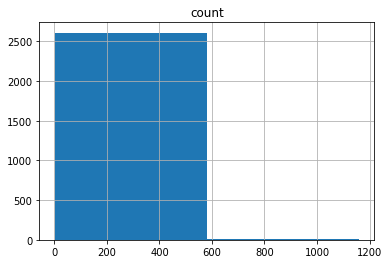

In [650]:
claim_per_provider.hist(column='count',bins=2)

In [651]:
claim_per_provider.mean()

count    29.413093
dtype: float64

In [652]:
claim_per_provider.min()

count    1
dtype: int64

In [653]:
claim_per_provider.max()

count    1160
dtype: int64

In [654]:
bene_per_claim = inpatient.groupby(by=['BeneID'])['ClaimID'].agg(['count'])
bene_per_claim

,count
BeneID,
BENE100002,2
BENE100004,4
BENE100006,1
BENE100007,1
BENE100010,4
...,...
BENE99965,1
BENE99974,1
BENE99976,1


array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

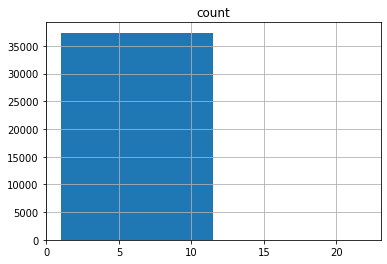

In [655]:
bene_per_claim.hist(column='count',bins=2)

In [656]:
bene_per_claim.mean()

count    2.05321
dtype: float64

In [657]:
bene_per_claim.max()

count    22
dtype: int64

In [658]:
bene_per_claim.min()

count    1
dtype: int64

In [659]:
inpatient['InscClaimAmtReimbursed'].mean()

10086.400484204773

In [660]:
inpatient['InscClaimAmtReimbursed'].max()

125000

In [661]:
inpatient['InscClaimAmtReimbursed'].min()

0

### Outpatient

In [662]:
## Claim per provider 
claim_per_provider_out = outpatient.groupby(by=['Provider'])['ClaimID'].agg(['count'])
## still get M, M, M 
claim_per_provider_out.reset_index()

,Provider,count
0,PRV51001,28
1,PRV51002,396
2,PRV51003,115
3,PRV51004,228
4,PRV51005,1545
...,...,...
6266,PRV57759,55
6267,PRV57760,26
6268,PRV57761,117
6269,PRV57762,1


(array([6.225e+03, 3.600e+01, 8.000e+00, 1.000e+00, 1.000e+00]),
 array([1.0000e+00, 2.2820e+03, 4.5630e+03, 6.8440e+03, 9.1250e+03,
        1.1406e+04]),
 <BarContainer object of 5 artists>)

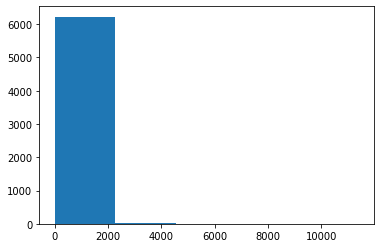

In [663]:
#claim_per_provider_out.hist(column='count',bins=2)
plt.hist(claim_per_provider_out, bins=5)

In [664]:
claim_per_provider_out.mean()

count    156.368841
dtype: float64

In [665]:
claim_per_provider_out.max()

count    11406
dtype: int64

In [666]:
bene_per_claim_out= outpatient.groupby(by=['BeneID'])['ClaimID'].agg(['count'])
bene_per_claim_out

,count
BeneID,
BENE100000,2
BENE100001,22
BENE100002,28
BENE100003,1
BENE100004,12
...,...
BENE99995,1
BENE99996,1
BENE99997,16


array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

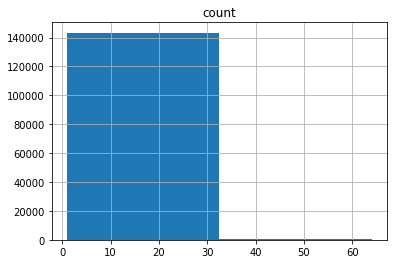

In [667]:
bene_per_claim_out.hist(column='count',bins=2)

In [668]:
bene_per_claim_out.mean()

count    6.80072
dtype: float64

In [669]:
bene_per_claim_out.max()

count    64
dtype: int64

In [670]:
bene_per_claim_out.min()

count    1
dtype: int64

In [671]:
outpatient['InscClaimAmtReimbursed'].mean()

291.489359966306

In [672]:
outpatient['InscClaimAmtReimbursed'].max()

102500

In [673]:
outpatient['InscClaimAmtReimbursed'].min()

0

## Value Replacements 

In [674]:
from datetime import date
import numpy as np

### Inpatient Dataset

#### Calculating Number of Days patient was admitted then drop 'AdmissionDt' and 'DischargeDt'. We will do the same to the dates associated with claim dates  

#### Inpatient: Delta to Derive Number of Admit Days

In [675]:
tmp_date= inpatient

In [676]:
tmp_date['AdmissionDt']= pd.to_datetime(tmp_date['AdmissionDt'])

In [677]:
tmp_date['DischargeDt']= pd.to_datetime(tmp_date['DischargeDt'])

In [678]:
tmp_date['AdmitDays']=tmp_date['DischargeDt'] - tmp_date['AdmissionDt']



In [679]:
tmp_date['AdmitDays']= tmp_date['AdmitDays'].apply(lambda x: x.days)

In [680]:
tmp_date.AdmitDays=tmp_date.AdmitDays.astype('int64')
type(tmp_date.iloc[0]['AdmitDays'])

numpy.int64

#### Outpatient: Delta to Derive Number of Claim Days 

In [731]:
tmp_date_out= outpatient

In [732]:
tmp_date_out['ClaimStartDt']= pd.to_datetime(tmp_date_out['ClaimStartDt'])
tmp_date_out['ClaimEndDt']= pd.to_datetime(tmp_date_out['ClaimEndDt'])

In [734]:
tmp_date_out['ClaimDays']=tmp_date_out['ClaimEndDt'] - tmp_date_out['ClaimStartDt']

In [735]:
tmp_date_out['ClaimDays']= tmp_date_out['ClaimDays'].apply(lambda x: x.days)

In [736]:
tmp_date_out.ClaimDays=tmp_date_out.ClaimDays.astype('int64')

####  Inpatient: Delta to Derive Number of Claim Days 

In [752]:
tmp_date['ClaimStartDt']= pd.to_datetime(tmp_date['ClaimStartDt'])
tmp_date['ClaimEndDt']= pd.to_datetime(tmp_date['ClaimEndDt'])

In [751]:
tmp_date['ClaimDays']=tmp_date['ClaimEndDt'] - tmp_date['ClaimStartDt']
#tmp_date.ClaimDays=tmp_date.ClaimDays.astype('int64')

In [753]:
tmp_date['ClaimDays']= tmp_date['ClaimDays'].apply(lambda x: x.days)

In [749]:
tmp_date.ClaimDays=tmp_date.ClaimDays.astype('int64')

In [754]:
drop_inp1= ['ClaimEndDt', 'ClaimStartDt','AdmissionDt','DischargeDt' ]

### Recoding  Providers

In [686]:
tmp_date.dtypes

BeneID                                     object
ClaimID                                    object
ClaimStartDt                       datetime64[ns]
ClaimEndDt                         datetime64[ns]
Provider                                   object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
AdmissionDt                        datetime64[ns]
ClmAdmitDiagnosisCode                      object
DeductibleAmtPaid                         float64
DischargeDt                        datetime64[ns]
DiagnosisGroupCode                         object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object


In [756]:
tmp_date.Provider=tmp_date.Provider.astype('str')
tmp_date_out.Provider=tmp_date_out.Provider.astype('str')
tmp_date.iloc[1]['Provider']

'PRV55912'

In [757]:
def remove_prefix(text, prefix):
    if text.startswith(prefix):
        return text[len(prefix):]
    return text

In [758]:
def provider_cleaner(df, col_name, prefix):
    df2= []
    b=len(df)
    for i in range (b):
        text= df.iloc[i][col_name]
        df2.append(remove_prefix(text,prefix))
    return df2 
    
    

In [690]:
tmp_=provider_cleaner(tmp_date,'Provider',"PRV")


In [759]:
tmp_out=provider_cleaner(tmp_date_out,'Provider',"PRV")

In [760]:
tmp_date['Provider_C']=tmp_
tmp_date_out['Provider_C']=tmp_out


In [761]:
#tmp_date

In [ ]:
#tmp_date_out

#### Repeat for 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician' 

In [762]:
tmp_date.AttendingPhysician=tmp_date.AttendingPhysician.astype('str')
tmp_date_out.AttendingPhysician=tmp_date_out.AttendingPhysician.astype('str')

In [763]:
tmp_date.OperatingPhysician=tmp_date.OperatingPhysician.astype('str')
tmp_date_out.OperatingPhysician=tmp_date_out.OperatingPhysician.astype('str')


In [764]:
tmp_date.OtherPhysician=tmp_date.OtherPhysician.astype('str')
tmp_date_out.OtherPhysician=tmp_date_out.OtherPhysician.astype('str')

In [765]:
tmp_Attending=provider_cleaner(tmp_date,'AttendingPhysician',"PHY")
tmp_Attending_out=provider_cleaner(tmp_date_out,'AttendingPhysician',"PHY")

In [766]:
tmp_Operating=provider_cleaner(tmp_date,'OperatingPhysician',"PHY")
tmp_Operating_out=provider_cleaner(tmp_date_out,'OperatingPhysician',"PHY")

In [767]:
tmp_Other=provider_cleaner(tmp_date,'OtherPhysician',"PHY")
tmp_Other_out=provider_cleaner(tmp_date_out,'OtherPhysician',"PHY")

In [768]:
tmp_date['Attending_P']=tmp_Attending
tmp_date_out['Attending_P']=tmp_Attending_out

In [769]:
tmp_date['Operating_P']=tmp_Operating
tmp_date_out['Operating_P']=tmp_Operating_out

In [770]:
tmp_date['Other_P']=tmp_Other
tmp_date_out['Other_P']=tmp_Other_out

In [771]:
# New cols added
tmp_date

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,AdmitDays,ClaimDays,Provider_C,Attending_P,Operating_P,Other_P
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,nan,nan,2009-04-12,...,36000,3204,60,70,6,6,55912,390922,nan,nan
1,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,nan,nan,2009-04-12,...,36000,3204,60,70,6,6,55912,390922,nan,nan
2,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,nan,2009-08-31,...,36000,3204,60,70,2,2,55907,318495,318495,nan
3,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,nan,2009-08-31,...,36000,3204,60,70,2,2,55907,318495,318495,nan
4,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,nan,PHY324689,2009-09-17,...,36000,3204,60,70,3,3,56046,372395,nan,324689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76822,BENE159155,CLM67124,2009-09-07,2009-10-12,PRV53758,5000,PHY338118,nan,nan,2009-09-07,...,13600,1068,0,0,35,35,53758,338118,nan,nan
76823,BENE159181,CLM72016,2009-10-14,2009-10-17,PRV57195,3000,PHY328451,nan,nan,2009-10-14,...,3000,1068,3440,260,3,3,57195,328451,nan,nan
76824,BENE159181,CLM72016,2009-10-14,2009-10-17,PRV57195,3000,PHY328451,nan,nan,2009-10-14,...,3000,1068,3440,260,3,3,57195,328451,nan,nan
76825,BENE159196,CLM47313,2009-04-17,2009-04-18,PRV51854,2000,PHY377087,nan,nan,2009-04-17,...,2000,1068,3240,1390,1,1,51854,377087,nan,nan


In [772]:
tmp_date_out

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimDays,Provider_C,Attending_P,Operating_P,Other_P
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,nan,nan,78943,...,2,0,0,30,50,0,56011,326117,nan,nan
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,nan,nan,6115,...,2,0,0,90,40,0,57610,362868,nan,nan
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,nan,nan,2723,...,2,0,0,90,40,0,57595,328821,nan,nan
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,nan,nan,71988,...,2,0,0,1810,760,0,56011,334319,nan,nan
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,nan,nan,82382,...,2,0,0,1810,760,0,56011,403831,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980584,BENE159144,CLM174166,2009-02-03,2009-02-03,PRV55844,10,PHY374369,nan,nan,V6759,...,2,0,0,10,0,0,55844,374369,nan,nan
980585,BENE159149,CLM631108,2009-10-14,2009-11-03,PRV54987,600,PHY364693,PHY364693,PHY364693,V560,...,2,0,0,600,500,20,54987,364693,364693,364693
980586,BENE159193,CLM469576,2009-07-14,2009-07-14,PRV55485,70,PHY431265,nan,nan,79021,...,2,0,0,110,50,0,55485,431265,nan,nan
980587,BENE159193,CLM483842,2009-07-22,2009-07-22,PRV55485,10,PHY369098,nan,nan,72811,...,2,0,0,110,50,0,55485,369098,nan,nan


### Dealing with Claims

In [788]:
list(tmp_date_out)

['BeneID',
 'ClaimID',
 'ClaimStartDt',
 'ClaimEndDt',
 'Provider',
 'InscClaimAmtReimbursed',
 'AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'DeductibleAmtPaid',
 'ClmAdmitDiagnosisCode',
 'DOB',
 'DOD',
 'Gender',
 'Race',
 'RenalDiseaseIndicator',
 'State',
 'County',
 'NoOfMonths_PartACov',
 'NoOfMonths_PartBCov',
 'ChronicCond_Alzheimer',
 'ChronicCond_Heartfailure',
 'ChronicCond_KidneyDisease',
 'ChronicCond_Cancer',
 'ChronicCond_ObstrPulmonary',
 'ChronicCond_Depression',
 'ChronicCond_Diabetes',
 'ChronicCond_IschemicHeart',
 'ChronicCond_Osteoporasis',
 'ChronicCond_rheumatoidarthritis',
 'Chro

In [782]:
base= tmp_date

In [783]:
# Inpatient
tmp_date.ClmAdmitDiagnosisCode=tmp_date.ClmAdmitDiagnosisCode.astype('str')
tmp_date.ClmDiagnosisCode_1=tmp_date.ClmDiagnosisCode_1.astype('str')
tmp_date.ClmDiagnosisCode_2=tmp_date.ClmDiagnosisCode_2.astype('str')
tmp_date.ClmDiagnosisCode_3=tmp_date.ClmDiagnosisCode_3.astype('str')
tmp_date.ClmDiagnosisCode_4=tmp_date.ClmDiagnosisCode_4.astype('str')
tmp_date.ClmDiagnosisCode_5=tmp_date.ClmDiagnosisCode_5.astype('str')
tmp_date.ClmDiagnosisCode_6=tmp_date.ClmDiagnosisCode_6.astype('str')
tmp_date.ClmDiagnosisCode_7=tmp_date.ClmDiagnosisCode_7.astype('str')
tmp_date.ClmDiagnosisCode_8=tmp_date.ClmDiagnosisCode_8.astype('str')
tmp_date.ClmDiagnosisCode_9=tmp_date.ClmDiagnosisCode_9.astype('str')
tmp_date.ClmDiagnosisCode_10=tmp_date.ClmDiagnosisCode_10.astype('str')


In [789]:
## Outpatient
tmp_date_out.ClmAdmitDiagnosisCode=tmp_date_out.ClmAdmitDiagnosisCode.astype('str')
tmp_date_out.ClmDiagnosisCode_1=tmp_date_out.ClmDiagnosisCode_1.astype('str')
tmp_date_out.ClmDiagnosisCode_2=tmp_date_out.ClmDiagnosisCode_2.astype('str')
tmp_date_out.ClmDiagnosisCode_3=tmp_date_out.ClmDiagnosisCode_3.astype('str')
tmp_date_out.ClmDiagnosisCode_4=tmp_date_out.ClmDiagnosisCode_4.astype('str')
tmp_date_out.ClmDiagnosisCode_5=tmp_date_out.ClmDiagnosisCode_5.astype('str')
tmp_date_out.ClmDiagnosisCode_6=tmp_date_out.ClmDiagnosisCode_6.astype('str')
tmp_date_out.ClmDiagnosisCode_7=tmp_date_out.ClmDiagnosisCode_7.astype('str')
tmp_date_out.ClmDiagnosisCode_8=tmp_date_out.ClmDiagnosisCode_8.astype('str')
tmp_date_out.ClmDiagnosisCode_9=tmp_date_out.ClmDiagnosisCode_9.astype('str')
tmp_date_out.ClmDiagnosisCode_10=tmp_date_out.ClmDiagnosisCode_10.astype('str')

In [790]:
list_= ['ClmAdmitDiagnosisCode',
        'ClmDiagnosisCode_1' ,
            'ClmDiagnosisCode_2' ,
            'ClmDiagnosisCode_3' ,
            'ClmDiagnosisCode_4',
            'ClmDiagnosisCode_5',
            'ClmDiagnosisCode_6',
            'ClmDiagnosisCode_7',
            'ClmDiagnosisCode_8',
            'ClmDiagnosisCode_9',
            'ClmDiagnosisCode_10'    
]

In [791]:
def claim_cleaner(df,col_name):
    b=len(df) 
    df2=[]
    for n in range (b):
        text= df.iloc[n][col_name]
        if text[:1].isdigit():
                df2.append(text)
        elif text == 'nan':
            df2.append(text)
        else: 
            text = text.replace(text[0], '99')
            df2.append(text)
    return df2

        


In [ ]:
Admit_Code_out= claim_cleaner(tmp_date_out,'ClmAdmitDiagnosisCode')
y_1= claim_cleaner(tmp_date_out,'ClmDiagnosisCode_1')
y_2= claim_cleaner(tmp_date_out,'ClmDiagnosisCode_2')
y_3= claim_cleaner(tmp_date_out,'ClmDiagnosisCode_3')
y_4= claim_cleaner(tmp_date_out,'ClmDiagnosisCode_4')
y_5= claim_cleaner(tmp_date_out,'ClmDiagnosisCode_5')
y_6= claim_cleaner(tmp_date_out,'ClmDiagnosisCode_6')
y_7= claim_cleaner(tmp_date_out,'ClmDiagnosisCode_7')
y_8= claim_cleaner(tmp_date_out,'ClmDiagnosisCode_8')
y_9= claim_cleaner(tmp_date_out,'ClmDiagnosisCode_9')
y_10= claim_cleaner(tmp_date_out,'ClmDiagnosisCode_10')

In [707]:
Admit_Code= claim_cleaner(tmp_date,'ClmAdmitDiagnosisCode')

In [708]:
x_1= claim_cleaner(tmp_date,'ClmDiagnosisCode_1')
#x_1

In [709]:
x_2= claim_cleaner(tmp_date,'ClmDiagnosisCode_2')
#x_2

In [710]:
x_3= claim_cleaner(tmp_date,'ClmDiagnosisCode_3')
#x_3

In [711]:
x_4= claim_cleaner(tmp_date,'ClmDiagnosisCode_4')
#x_4

In [712]:
x_5= claim_cleaner(tmp_date,'ClmDiagnosisCode_5')
#x_5

In [713]:
x_6= claim_cleaner(tmp_date,'ClmDiagnosisCode_6')
#x_6

In [714]:
x_7= claim_cleaner(tmp_date,'ClmDiagnosisCode_7')
#x_7

In [715]:
x_8= claim_cleaner(tmp_date,'ClmDiagnosisCode_8')
#x_8

In [716]:
x_9= claim_cleaner(tmp_date,'ClmDiagnosisCode_9')
#x_9

In [ ]:
x_10= claim_cleaner(tmp_date,'ClmDiagnosisCode_10')
#x_10

In [718]:
## conca
clean_claims= pd.DataFrame(
    { 'AdmitClmCode':Admit_Code,
     'ClmDCode_1': x_1,
     'ClmDCode_2': x_2,
     'ClmDCode_3': x_3,
     'ClmDCode_4': x_4,
     'ClmDCode_5': x_5,
     'ClmDCode_6': x_6,
     'ClmDCode_7': x_7,
     'ClmDCode_8': x_8,
     'ClmDCode_9': x_9,
     'ClmDCode_10': x_10,
     
    })

In [ ]:
clean_claims_out= pd.DataFrame(
    { 'AdmitClmCode':Admit_Code,
     'ClmDCode_1': y_1,
     'ClmDCode_2': y_2,
     'ClmDCode_3': y_3,
     'ClmDCode_4': y_4,
     'ClmDCode_5': y_5,
     'ClmDCode_6': y_6,
     'ClmDCode_7': y_7,
     'ClmDCode_8': y_8,
     'ClmDCode_9': y_9,
     'ClmDCode_10': y_10,
     
    })

In [719]:
#clean_claims

,AdmitClmCode,ClmDCode_1,ClmDCode_2,ClmDCode_3,ClmDCode_4,ClmDCode_5,ClmDCode_6,ClmDCode_7,ClmDCode_8,ClmDCode_9,ClmDCode_10
0,7866,1970,4019,5853,7843,2768,71590,2724,19889,5849,nan
1,7866,1970,4019,5853,7843,2768,71590,2724,19889,5849,nan
2,6186,6186,2948,56400,nan,nan,nan,nan,nan,nan,nan
3,6186,6186,2948,56400,nan,nan,nan,nan,nan,nan,nan
4,29590,29623,30390,71690,34590,991581,32723,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...
76822,78903,1981,27651,71690,41401,4019,591,998798,60000,28521,4280
76823,7843,43311,40390,99667,7840,4019,4371,2724,25080,29383,nan
76824,7843,43311,40390,99667,7840,4019,4371,2724,25080,29383,nan
76825,78659,41400,60000,991582,4111,99854,4019,25000,991251,2720,nan


In [ ]:
inp_cln= pd.concat([tmp_date, clean_claims], axis=1)
list(inp_cln)


In [ ]:
outp_cln= pd.concat([tmp_date_out, clean_claims_out], axis=1)
list(outp_cln)


### Derive Age 

In [774]:
tmp_date.DOD=tmp_date.DOD.astype('str')
tmp_date['DOD'].unique()


array(['nan', '2009-05-01', '2009-08-01', '2009-07-01', '2009-06-01',
       '2009-12-01', '2009-11-01', '2009-04-01', '2009-10-01',
       '2009-03-01', '2009-09-01', '2009-02-01'], dtype=object)

In [722]:
 def dod_nan (df): 
    df2=[]
    len_df=len(df)
    for i in range (len_df):
        val= df.iloc[i]['DOD']
        if val == 'nan':
            val= df.iloc[i]['AdmissionDt']
            df2.append(val)
        else: 
            df2.append(val)
    return df2
         

In [723]:
dod_clean= dod_nan(tmp_date)
dod_clean

[Timestamp('2009-04-12 00:00:00'),
 Timestamp('2009-04-12 00:00:00'),
 Timestamp('2009-08-31 00:00:00'),
 Timestamp('2009-08-31 00:00:00'),
 Timestamp('2009-09-17 00:00:00'),
 Timestamp('2009-09-17 00:00:00'),
 Timestamp('2009-02-14 00:00:00'),
 Timestamp('2009-02-14 00:00:00'),
 Timestamp('2009-08-13 00:00:00'),
 Timestamp('2009-08-13 00:00:00'),
 Timestamp('2009-09-09 00:00:00'),
 Timestamp('2009-09-09 00:00:00'),
 Timestamp('2009-10-06 00:00:00'),
 Timestamp('2009-10-06 00:00:00'),
 Timestamp('2008-12-25 00:00:00'),
 Timestamp('2008-12-25 00:00:00'),
 Timestamp('2009-01-02 00:00:00'),
 Timestamp('2009-08-03 00:00:00'),
 Timestamp('2009-08-06 00:00:00'),
 Timestamp('2009-08-06 00:00:00'),
 Timestamp('2009-06-23 00:00:00'),
 Timestamp('2009-06-23 00:00:00'),
 Timestamp('2008-12-29 00:00:00'),
 Timestamp('2009-07-01 00:00:00'),
 Timestamp('2009-09-30 00:00:00'),
 Timestamp('2009-08-26 00:00:00'),
 Timestamp('2009-06-10 00:00:00'),
 Timestamp('2009-06-10 00:00:00'),
 Timestamp('2009-12-

In [724]:
tmp_in['DOD']=dod_clean

ValueError: Length of values (76827) does not match length of index (50025)

In [ ]:
tmp_in['DOB']= pd.to_datetime(tmp_in['DOB'])

In [ ]:
tmp_in['DOD']= pd.to_datetime(tmp_in['DOD'])

In [ ]:
tmp_in['Age']= tmp_in['DOD'] - tmp_in['DOB']

In [ ]:
tmp_in['Age']= tmp_in['Age'].apply(lambda x: x.days)

In [ ]:
#.astype('int64')
tmp_in['Age']= tmp_in['Age'].astype('int64')

In [ ]:
tmp_in['Age']= tmp_in['Age'].apply(lambda x: x/365)

In [ ]:
tmp_in.iloc[0]['Age']

### DOD 

In [ ]:
tmp_date['DOD']

In [ ]:
#.astype('int64')
_dod= tmp_date['DOD'].fillna(0)
_dod


In [ ]:
h= _dod[0]
h

In [ ]:
x=_dod[20]
#x.isna()
type(x)

In [ ]:
 def is_dead (val):
    if val =='nan':
        val= 0 
    else: 
        val= 1
    return val
    
   

In [ ]:
y= _dod.isnull()
#y= y.apply(lambda x:is_dead(x))

y


In [ ]:
inpatient.shape

In [ ]:
tmp_date.shape

In [ ]:
list(tmp_in)

In [ ]:
tmp_in['DOD_Code']= y
list(tm_in_copy.dtypes)


In [ ]:
list(tm_in_copy)

In [ ]:
merged_cleaned_in= tm_in_copy

In [ ]:
cols_drop= ['ClaimStartDt',
             'ClaimEndDt',
             'AdmissionDt',
             'DischargeDt',
            'ClmDiagnosisCode_1',
             'ClmDiagnosisCode_2',
             'ClmDiagnosisCode_3',
             'ClmDiagnosisCode_4',
             'ClmDiagnosisCode_5',
             'ClmDiagnosisCode_6',
             'ClmDiagnosisCode_7',
             'ClmDiagnosisCode_8',
             'ClmDiagnosisCode_9',
             'ClmDiagnosisCode_10',
            'DOB'         

           ]

In [ ]:
x=1
x

## Modeling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)